<a href="https://colab.research.google.com/github/vikasgandhavliya/vikasgandhavliya/blob/main/SVD_and_PCA_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Dimension Reduction of iris data using SVD & PCA 

$\textbf{Mandatory Key steps:}$

1. Loading the data set.
2. Feature Scaling of Dataset using StandardScaler function in scikit learn for Standardisation.
3. Use TruncatedSVD & PCA function in scikit learn to apply SVD & PCA for dimensionality reduction of iris dataset respectively.
4. Fit and transform the data set.
5. Visualize the reduced data using Matplotlib library to mark the difference between SVD, PCA on iris dataset.


#1. Import libraries and load dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = load_iris()

In [ ]:
old_data=data

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
df1=pd.DataFrame(data.data,columns=data['feature_names'])

In [ ]:
new_data=df1

In [ ]:
df2=pd.DataFrame(data.target,columns=['target'])

In [ ]:
df2

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


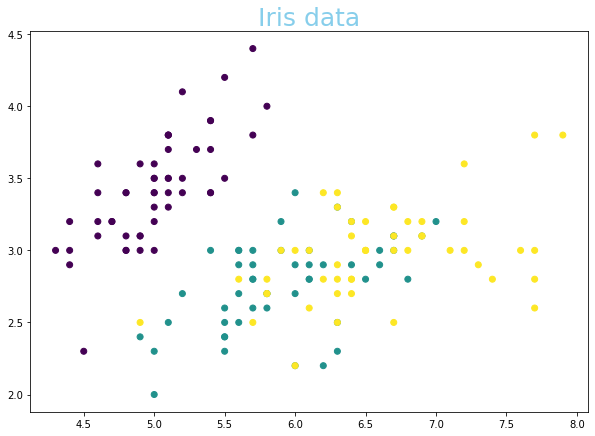

In [ ]:
plt.figure(figsize=(10, 7))
plt.title(label='Iris data',fontsize=25,color="skyblue")
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c=df2['target'])

# 2.Feature scaling of dataset by using StandardScaller

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in df1.columns:
  y=np.array(df1[i]).reshape(-1,1)
  df1[i]=sc.fit_transform(y)

In [ ]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
df1.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832
149,0.068662,-0.131979,0.762758,0.790671


# Using SVD

In [ ]:
svd = TruncatedSVD(n_components=2)
result= svd.fit_transform(df1)
print(result[0:5])

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


In [ ]:
r=pd.DataFrame(result,columns=['s1','s2'])
r.head()

,s1,s2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


#Using PCA

In [ ]:
pca = PCA(n_components=2)
result_pca = pca.fit_transform(df1)
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100)
sum(explained_variance*100)

[72.96244541 22.85076179]


95.81320720000164

In [ ]:
p=pd.DataFrame(result_pca,columns=['pc1','pc2'])
p.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


# Visualization of SVD and PCA Result

Text(0.5, 1.0, 'Relation between 1st and 2nd component of PCA')

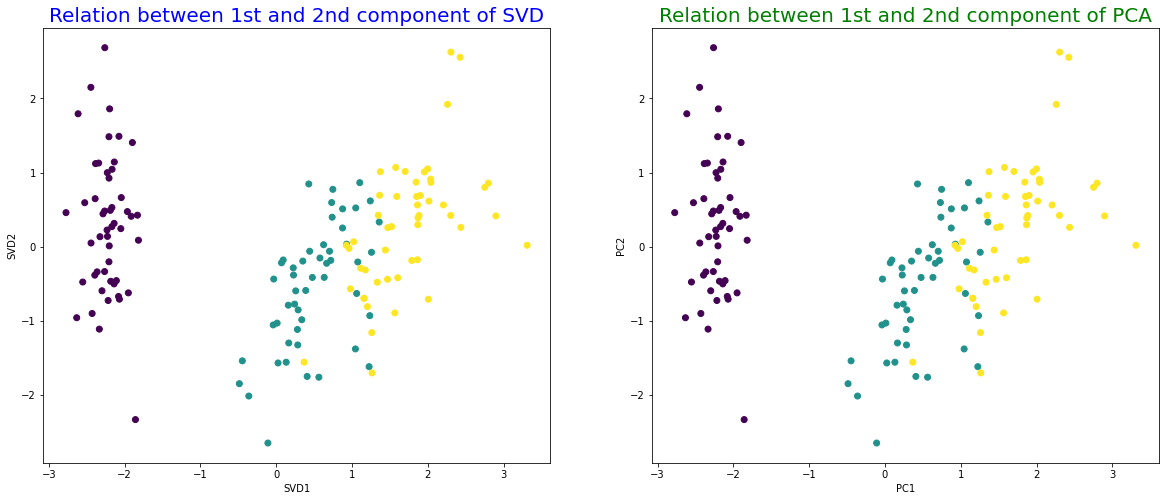

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.scatter(r['s1'],r['s2'],c=df2['target'])
plt.xlabel('SVD1')
plt.ylabel('SVD2')
plt.title(label='Relation between 1st and 2nd component of SVD',fontsize=20,color="blue")
plt.subplot(1, 2, 2)
plt.scatter(p['pc1'],p['pc2'],c=df2['target'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(label='Relation between 1st and 2nd component of PCA',fontsize=20,color="green")

## Conclussion:- Both of SVD and PCA performed similar decomposition for given dataset and there is no difference in values after dimension reduction techniques

Text(0.5, 1.0, 'Scree plot')

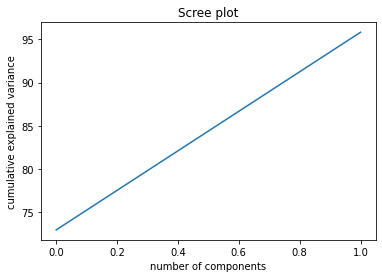

In [ ]:
Variance_Explaied=np.cumsum(np.round(pca.explained_variance_ratio_, decimals
=4)*100) # cummilative variance
plt.plot(Variance_Explaied)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree plot')


Text(0.5, 1.0, 'Scree plot')

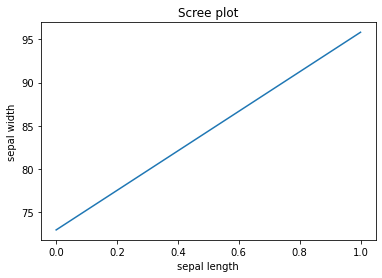

In [ ]:
Variance_Explaied=np.cumsum(np.round(pca.explained_variance_ratio_, decimals
=4)*100) # cummilative variance
plt.plot(Variance_Explaied)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Scree plot')

# Using  v ,u and sigma values

In [ ]:
sigma = svd.singular_values_
v = svd.components_
u = result/svd.singular_values_
print(sigma.shape)
print(v.shape)
print(u.shape)


(2,)
(2, 4)
(150, 2)


In [ ]:
# data_diff = np.subtract(old_data, new_data) data_squarediff =
# np.square(data_diff) print('Frobenius Norm = ',
# np.sqrt(data_squarediff.sum()))


# T-SNE model

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# Using TSNE to reduce to 2 features as indicated by first argument
tsne = TSNE(n_components=2)
# transforming the data set to 2 dimensions
New_points = tsne.fit_transform(df1.iloc[:,0:11])
# creating dataframe of new transformed data points in two features
Tsne_points =pd.DataFrame(New_points, columns= ['number of components',	'cumulative explained variance']
                         )
# concatinating data frame with class labels in original data set
# Tsne_model = pd.concat([Tsne_points,data.iloc[:,11]], axis = 1)

# printing the new data set

print(Tsne_points)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


     number of components  cumulative explained variance
0               21.012014                     -20.882113
1               17.575483                     -19.262960
2               18.970600                     -19.027431
3               18.381615                     -18.546389
4               21.740282                     -20.702816
..                    ...                            ...
145             -9.501513                       5.986932
146             -5.238862                       4.162978
147             -8.751506                       5.125744
148             -8.931242                       7.623978
149             -6.980918                       3.164369

[150 rows x 2 columns]
